# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Load the dataset

In [3]:
df = pd.read_csv("ecom_data_rfm.csv")

# Print the first 5 rows of the dataset

In [23]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   Unnamed: 0  CustomerID  Frequency  Recency  Monetary  rankR  rankF  rankM  \
0           1       12346          2      358      2.08      2      1      1   
1           2       12347        182       35    481.21      5      4      3   
2           3       12348         31      108    178.71      5      1      2   
3           4       12349         73       51    605.10      5      2      4   
4           5       12350         17      343     65.30      2      1      1   

   groupRFM         Country  Cluster  
0       211  United Kingdom        2  
1       543         Iceland        0  
2       512         Finland        0  
3       524           Italy        0  
4       211          Norway        2  


# Select relevant columns for clustering

In [4]:
X = df[['Frequency', 'Recency', 'Monetary']]

# Standardize the data

In [5]:
X_scaled = (X - X.mean()) / X.std()

# Determine the optimal value of K using the elbow method

In [6]:
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

# Plot the elbow curve

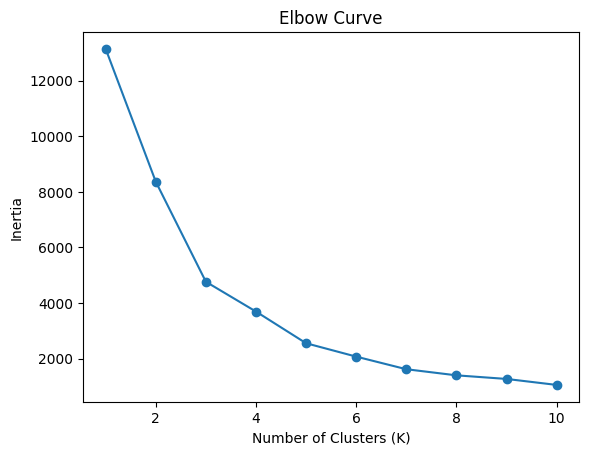

In [7]:
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

# Build the K-means model with the chosen value of K

In [8]:
k = 3  # Chosen value of K based on the elbow curve
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

# Add the cluster labels to the dataset

In [9]:
df['Cluster'] = kmeans.labels_

# Visualize the clusters

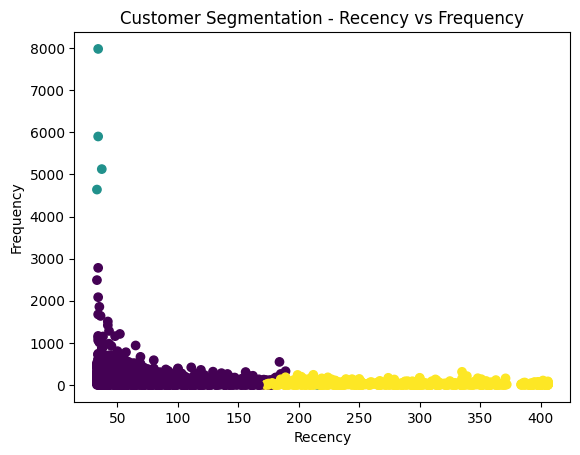

In [10]:
plt.scatter(df['Recency'], df['Frequency'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Customer Segmentation - Recency vs Frequency')
plt.show()

# Visualize the clusters using a 3D scatter plot

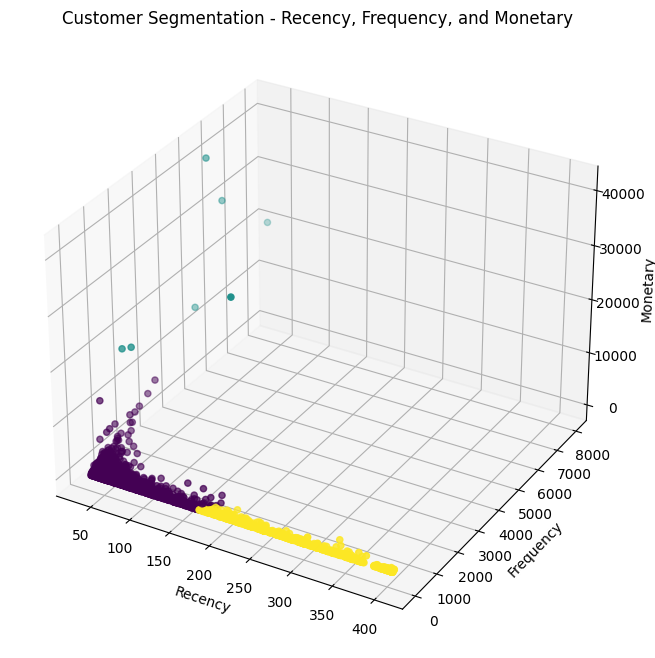

In [11]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Recency'], df['Frequency'], df['Monetary'], c=df['Cluster'], cmap='viridis')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('Customer Segmentation - Recency, Frequency, and Monetary')
plt.show()

# Calculate the mean values of each cluster

In [12]:
cluster_means = df.groupby('Cluster').mean()

<ipython-input-12-ef1a38eeae58>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = df.groupby('Cluster').mean()


# Print the profile of each cluster

In [13]:
for i in range(k):
    print(f"Cluster {i+1}:")
    print(cluster_means.loc[i])
    print()

Cluster 1:
Unnamed: 0     2176.308958
CustomerID    15275.004875
Frequency       107.713589
Recency          72.857404
Monetary        336.845720
rankR             4.865021
rankF             2.057282
rankM             2.099634
groupRFM        509.174589
Name: 0, dtype: float64

Cluster 2:
Unnamed: 0     1815.285714
CustomerID    14781.000000
Frequency      3452.000000
Recency          72.571429
Monetary      28197.814286
rankR             4.714286
rankF             4.285714
rankM             5.000000
groupRFM        519.285714
Name: 1, dtype: float64

Cluster 3:
Unnamed: 0     2235.597617
CustomerID    15356.125573
Frequency        27.566453
Recency         280.196150
Monetary         99.504859
rankR             2.536205
rankF             1.147571
rankM             1.217232
groupRFM        266.313474
Name: 2, dtype: float64



# Visualize the profile of each cluster

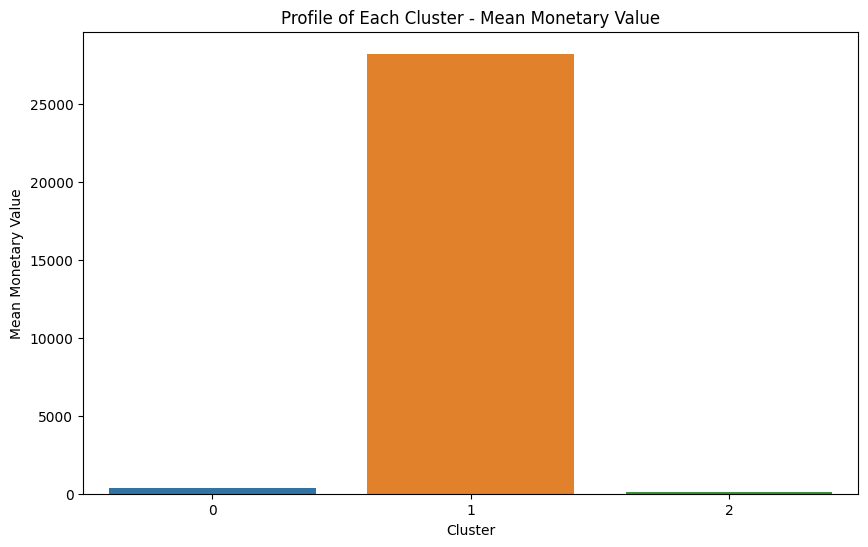

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_means.index, y=cluster_means['Monetary'])
plt.xlabel('Cluster')
plt.ylabel('Mean Monetary Value')
plt.title('Profile of Each Cluster - Mean Monetary Value')
plt.show()

# Identify the business value customer segments

In [15]:
business_value_segments = cluster_means[cluster_means['Monetary'] > df['Monetary'].mean()]

# Justify their business value


# Visualize the business value customer segments


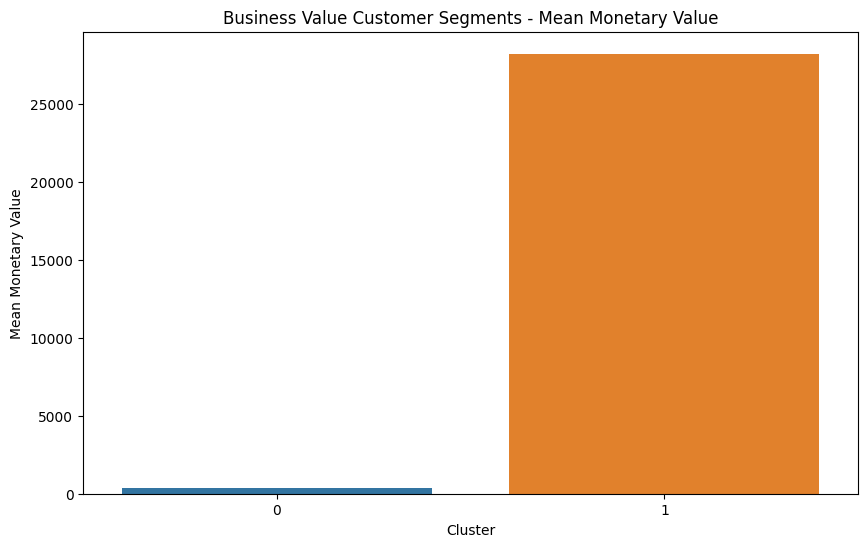

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x=business_value_segments.index, y=business_value_segments['Monetary'])
plt.xlabel('Cluster')
plt.ylabel('Mean Monetary Value')
plt.title('Business Value Customer Segments - Mean Monetary Value')
plt.show()

# Additional Visualizations and Tables

# Cluster Distribution Bar Chart

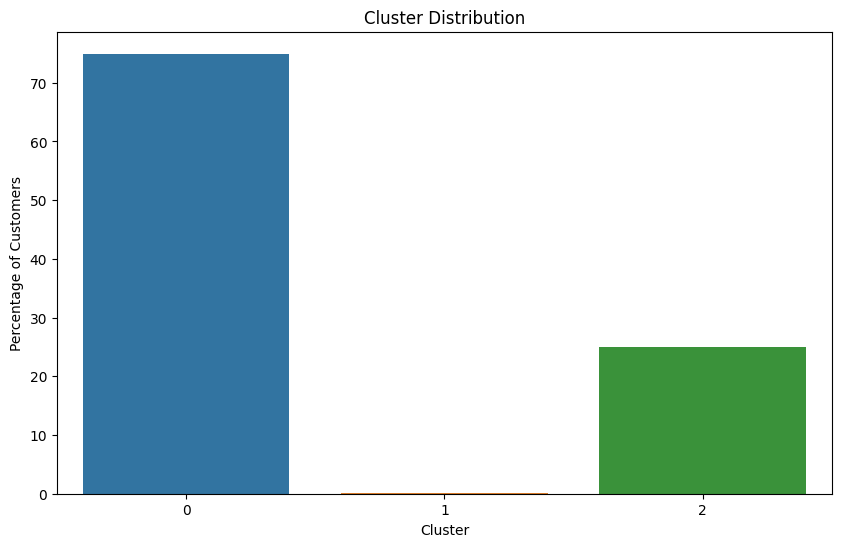

In [31]:
plt.figure(figsize=(10, 6))
cluster_counts = df['Cluster'].value_counts(normalize=True) * 100
sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Percentage of Customers')
plt.title('Cluster Distribution')
plt.show()

# Cluster Characteristics Table

In [32]:
cluster_characteristics = cluster_means[['Frequency', 'Recency', 'Monetary']]
cluster_characteristics.columns = ['Average Frequency', 'Average Recency', 'Average Monetary']
cluster_characteristics.index.name = 'Cluster'
print(cluster_characteristics)

         Average Frequency  Average Recency  Average Monetary
Cluster                                                      
0               107.713589        72.857404        336.845720
1              3452.000000        72.571429      28197.814286
2                27.566453       280.196150         99.504859


# Customer Segment Profiles

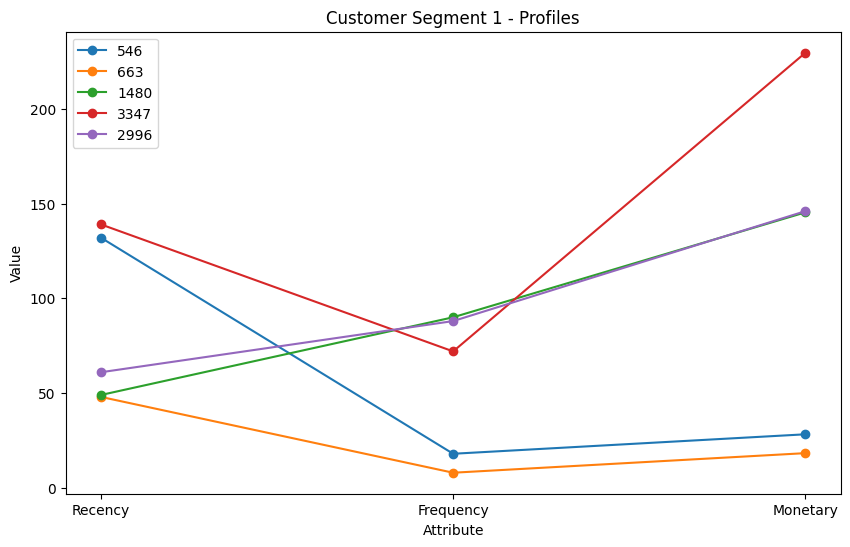

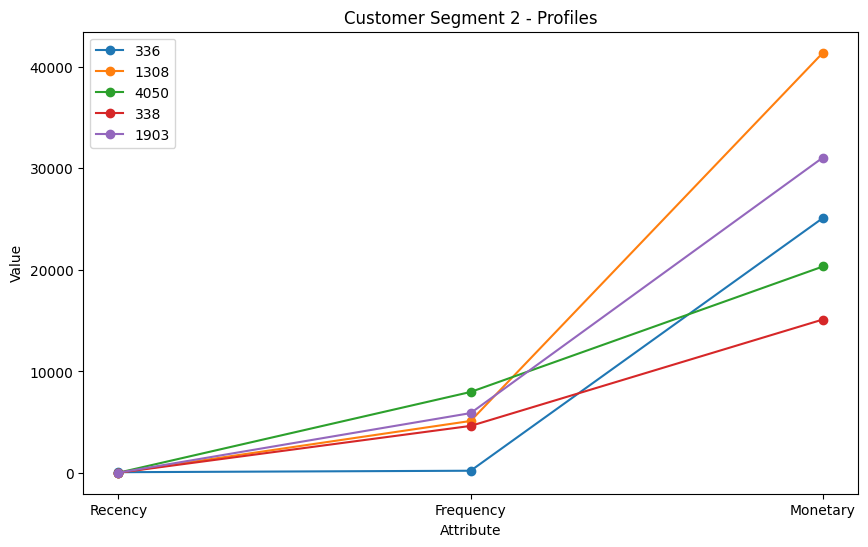

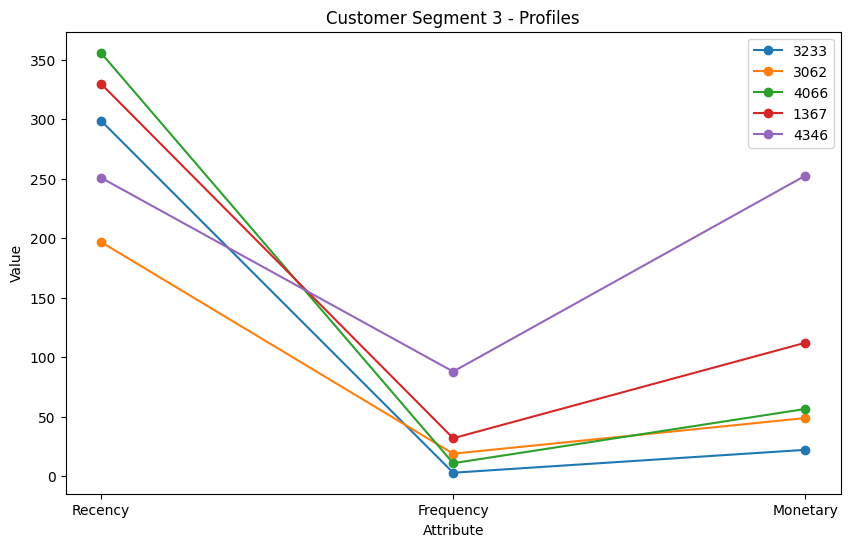

In [33]:
for cluster_id, cluster_data in cluster_means.iterrows():
    plt.figure(figsize=(10, 6))
    cluster_customers = df[df['Cluster'] == cluster_id].sample(5)  # Selecting 5 representative customers
    for _, customer in cluster_customers.iterrows():
        customer_values = customer[['Recency', 'Frequency', 'Monetary']]
        plt.plot(range(1, 4), customer_values, marker='o')
    plt.xlabel('Attribute')
    plt.ylabel('Value')
    plt.title(f'Customer Segment {cluster_id + 1} - Profiles')
    plt.xticks(range(1, 4), ['Recency', 'Frequency', 'Monetary'])
    plt.legend(cluster_customers.index)
    plt.show()

# Customer Segment Comparison Chart

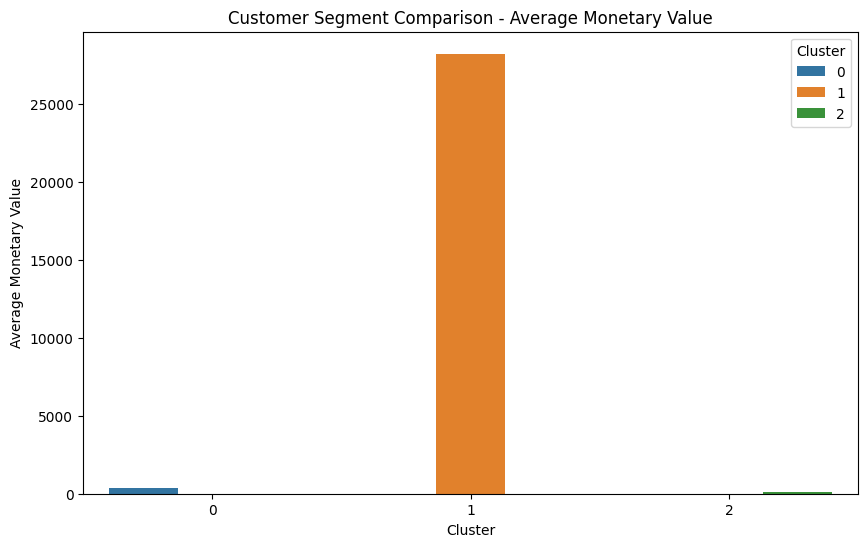

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_characteristics.reset_index(), x='Cluster', y='Average Monetary', hue='Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Monetary Value')
plt.title('Customer Segment Comparison - Average Monetary Value')
plt.show()

# Data Mart Design:
# Identify the main dimensions for the data mart

In [17]:
dimensions = ['CustomerID', 'Country', 'Recency', 'Frequency', 'Monetary', 'Cluster']

# Justify the selected dimensions
# Identify the measures for the data mart

In [18]:
measures = ['Revenue', 'Conversion Rate', 'Customer Lifetime Value']

# Justify the selected measures